<a href="https://colab.research.google.com/github/zaccowan/MLA_ZSC/blob/main/MLA2_ZSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Zac Cowan**  

## Standard Imports

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [101]:
from sklearn.linear_model import LogisticRegression, LinearRegression

# Setting up data
1. Read csv to dataframe
2. Rename columns to a more standardized format

In [102]:
df = pd.read_csv("/content/drive/MyDrive/MLA/MLA2/Steel_industry_data.csv")
df.sample()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
22567,24/08/2018 02:00,2.95,5.4,0.0,0.0,47.94,100.0,7200,Weekday,Friday,Light_Load


In [103]:
df=df.rename(columns={
    "Usage_kWh": "usage_kwh",
    "Lagging_Current_Reactive.Power_kVarh": "lag_react_pwr_kvarh",
    "Leading_Current_Reactive_Power_kVarh": "lead_react_pwr_kvarh",
    "Lagging_Current_Power_Factor": "lag_current_pwr",
    "Leading_Current_Power_Factor": "lead_current_pwr",
    "NSM": "nsm",
    "WeekStatus": "week_status",
    "Day_of_week": "Day_of_week",
    "Load_Type": "load_type"}
             )

In [104]:
df

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,Day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# Statistical and Visual Exploration

In [105]:
num_cols=df.select_dtypes("number")
num_cols.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  35040 non-null  object 
 1   usage_kwh             35040 non-null  float64
 2   lag_react_pwr_kvarh   35040 non-null  float64
 3   lead_react_pwr_kvarh  35040 non-null  float64
 4   CO2(tCO2)             35040 non-null  float64
 5   lag_current_pwr       35040 non-null  float64
 6   lead_current_pwr      35040 non-null  float64
 7   nsm                   35040 non-null  int64  
 8   week_status           35040 non-null  object 
 9   Day_of_week           35040 non-null  object 
 10  load_type             35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


In [107]:
df["date"] = pd.to_datetime(df["date"], format="mixed")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  35040 non-null  datetime64[ns]
 1   usage_kwh             35040 non-null  float64       
 2   lag_react_pwr_kvarh   35040 non-null  float64       
 3   lead_react_pwr_kvarh  35040 non-null  float64       
 4   CO2(tCO2)             35040 non-null  float64       
 5   lag_current_pwr       35040 non-null  float64       
 6   lead_current_pwr      35040 non-null  float64       
 7   nsm                   35040 non-null  int64         
 8   week_status           35040 non-null  object        
 9   Day_of_week           35040 non-null  object        
 10  load_type             35040 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 2.9+ MB


In [11]:
# the following is the counts for each load type in terms of samples
# Note: 96 samples were taken per day - a sample every 15 minutes for 24 hours
load_count_samples=df["load_type"].value_counts()
load_count_samples

,count
load_type,
Light_Load,18072
Medium_Load,9696
Maximum_Load,7272


In [12]:
# 96 samples taken of load_type per day.
#So divide the total counts by 96 to get the number of days the load_type was present.
load_count_days=df["load_type"].value_counts()/96
load_count_days

,count
load_type,
Light_Load,188.25
Medium_Load,101.00
Maximum_Load,75.75


Text(0, 0.5, 'Number of Samples')

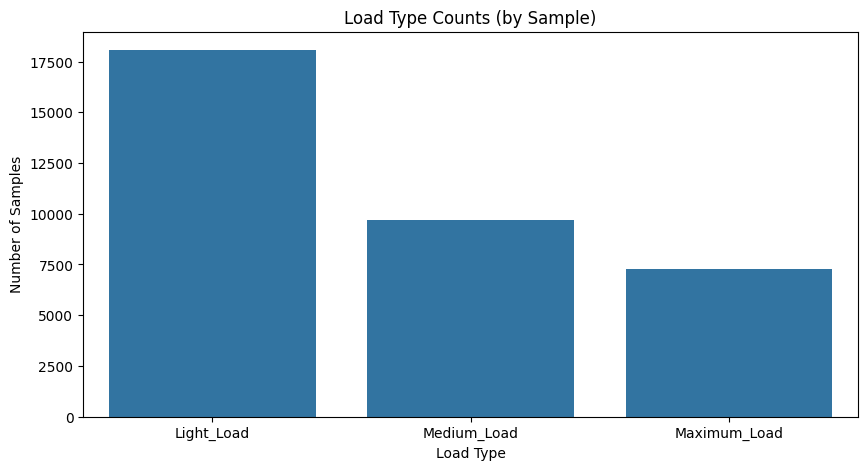

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=load_count_samples.index, y=load_count_samples.values)
plt.title("Load Type Counts (by Sample)")
plt.xlabel("Load Type")
plt.ylabel("Number of Samples")

Text(0, 0.5, 'Number of Days')

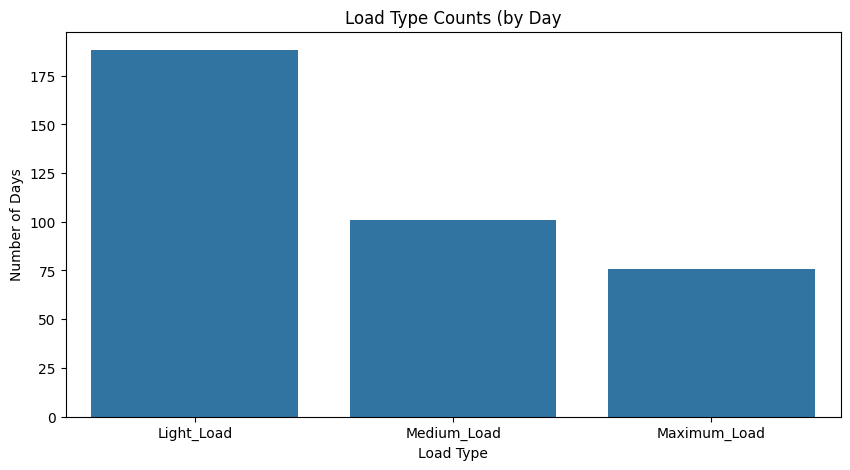

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=load_count_days.index, y=load_count_days.values)

plt.title("Load Type Counts (by Day")
plt.xlabel("Load Type")
plt.ylabel("Number of Days")

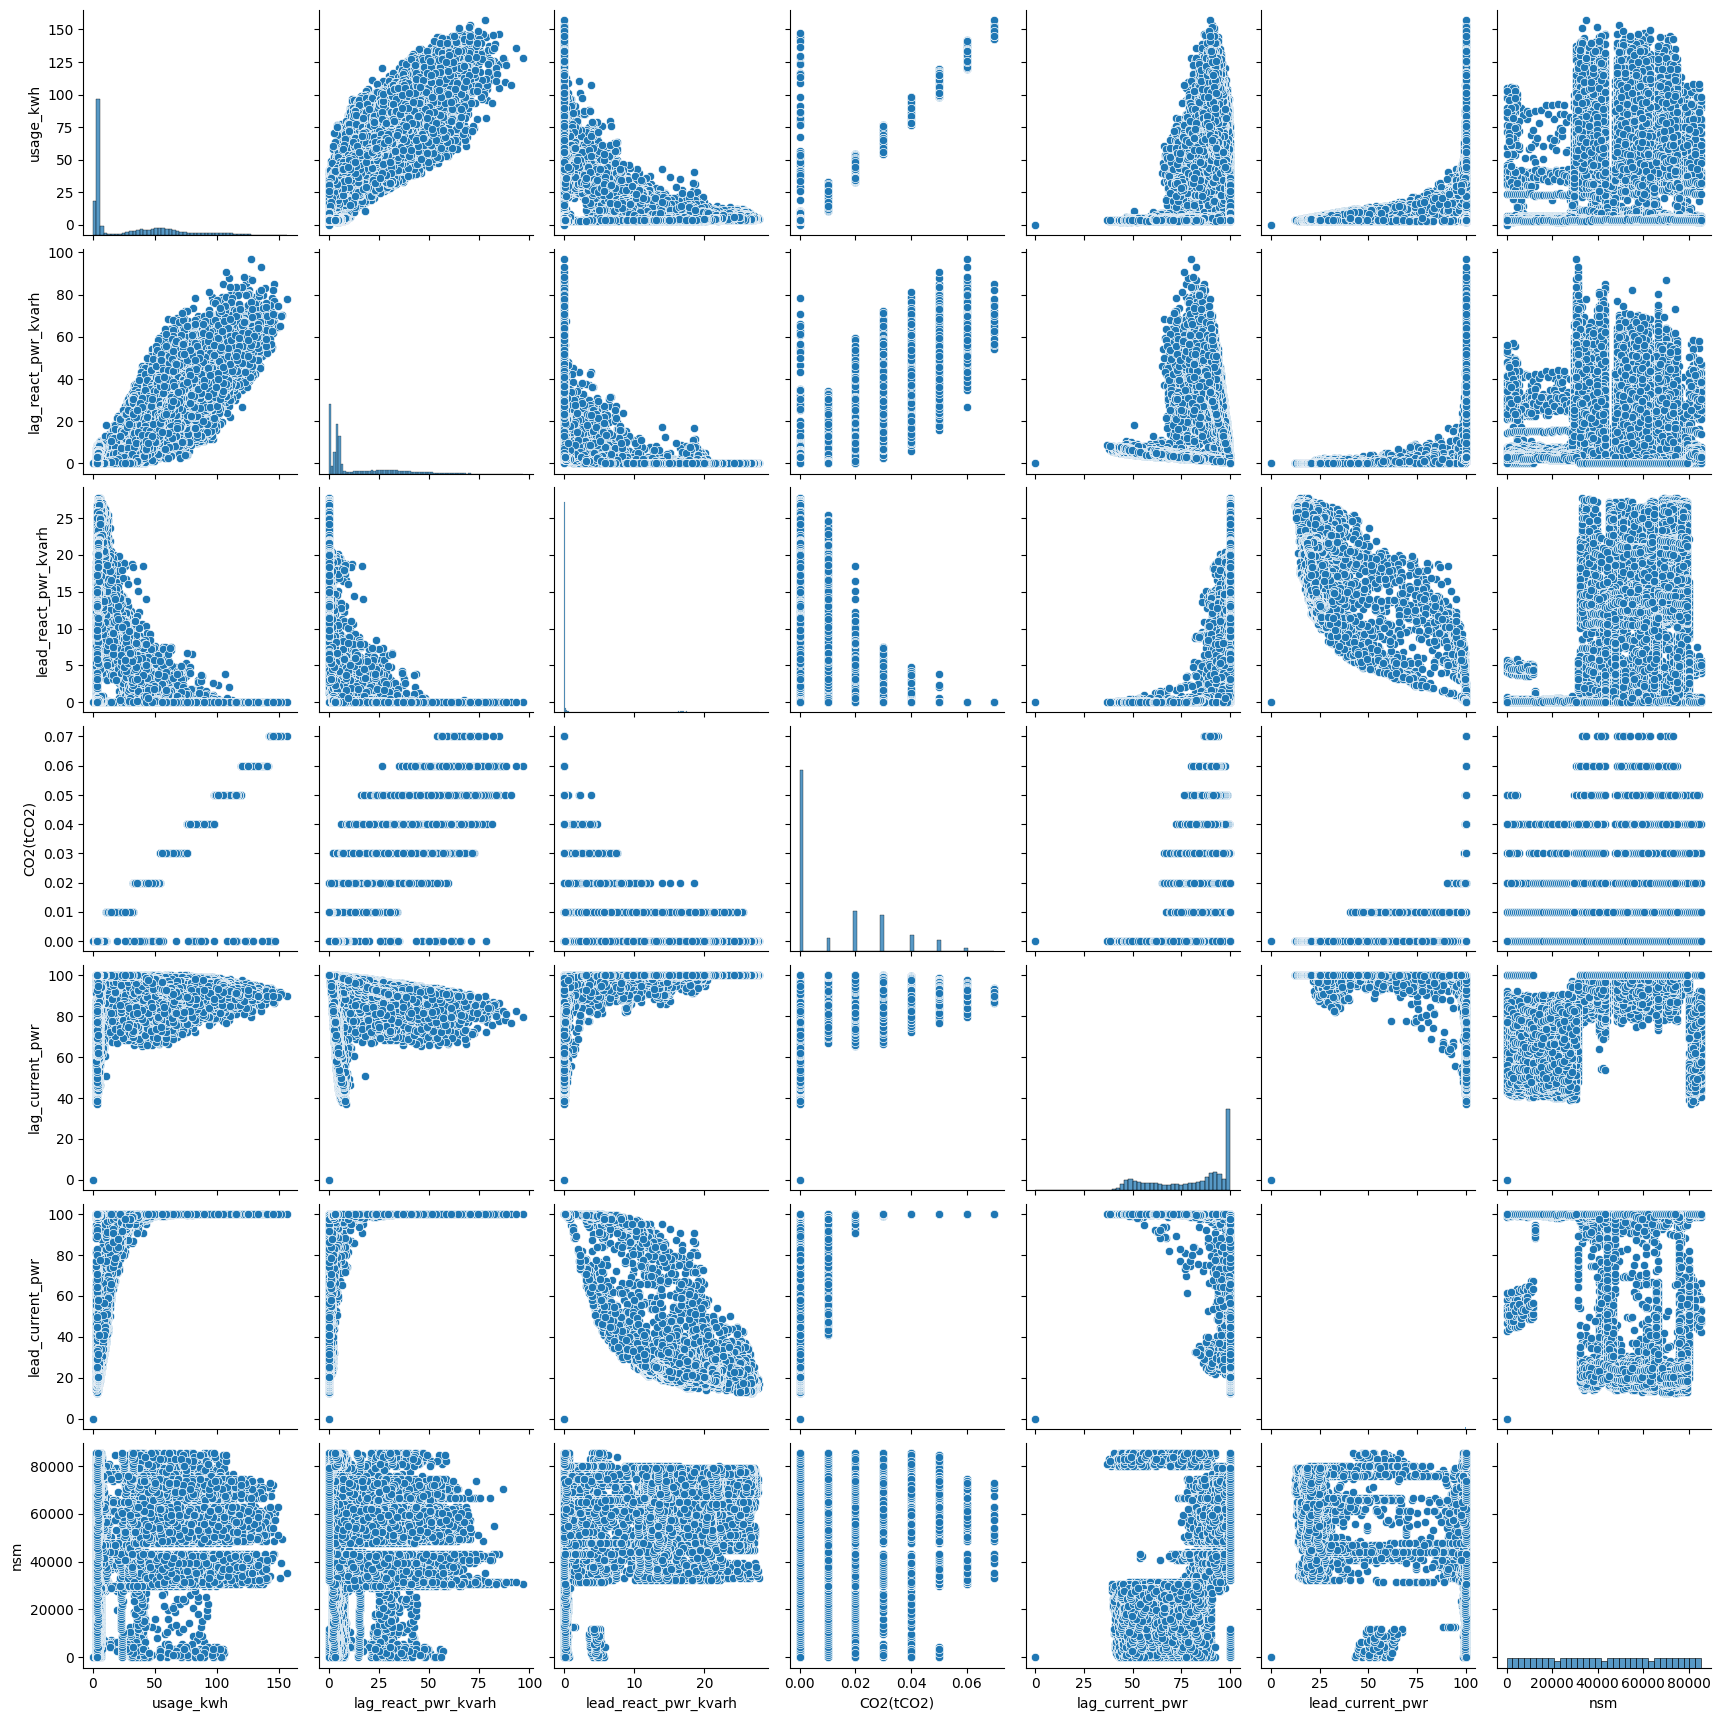

In [15]:
sns.pairplot(num_cols)

# Numerical Data Observations
1. The light load type takes up the majority of the days in 2018.
2. Maximum load take up approximately 20% of the year.

## Imports for Splitting Data and Building Pipeline


In [16]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [17]:
x = df.drop(["date","usage_kwh"], axis=1)
y = df["usage_kwh"]
print(x.shape)
print(y.shape)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(35040, 9)
(35040,)
(28032, 9)
(28032,)
(7008, 9)
(7008,)


In [118]:
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, drop="first"))
])

In [119]:
numerical_cols = x.select_dtypes(include="number").columns
categorical_cols = x.select_dtypes(include="object").columns

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [21]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", LinearRegression())])
pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['week_status', 'Day_of_week', 'load_type'], dtype='object'))])),
                ('classifier', LinearRegression())])

In [22]:
from sklearn.metrics import accuracy_score
y_pred=pipeline.predict(test_x)

# Imports for Performance Measures

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [24]:
root_mean_squared_error(test_y, y_pred)

4.224012202014671

In [25]:
r2_score(test_y, y_pred)

0.9843037490428131

In [26]:
pipeline.score(test_x, test_y)

0.9843037490428131

In [34]:
print("Coefficients:\n")
pd.DataFrame(pipeline.named_steps["classifier"].coef_)

Coefficients:



,0
0,31.726203
1,1.967276
2,115.067949
3,12.185985
4,6.070393
5,-0.245728
6,0.126839
7,0.019165
8,-0.083552
9,0.210391


In [33]:
print("Intercept:\t", pipeline.named_steps["classifier"].intercept_)

Intercept:	 -11.835600116124684


In [53]:
x

,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,Day_of_week,load_type
0,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# Linear Regression Conclusion
The model had a good r2 score with a pretty low mse.

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [54]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [55]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

### Statistical and Visual Exploration

### Splitting Data into Train/Test

### Building the Pipeline

### Executing the Model

### Evaluating Model

### Conclusion
Write a general conclusion about the results of your model.

## Problem 2

### Reading the Data

In [109]:
df.sample()
df2=df.copy()

In [112]:
df2[["week_status"]]=df2[["week_status"]].replace({"Weekday":1, "Weekend":0})
df2.sample()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,Day_of_week,load_type
23246,2018-08-31 03:45:00,2.74,5.4,0.0,0.0,45.25,100.0,13500,1,Friday,Light_Load


### Splitting Data into Train/Test

In [114]:
x2=df2.drop(["date","week_status","Day_of_week"], axis=1)
y2=df2["week_status"]

In [115]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

### Building the Pipeline

In [121]:
numerical_transformer2 = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])
categorical_transformer2 = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, drop="first"))
])

In [122]:
numerical_cols2 = x2.select_dtypes(include="number").columns
categorical_cols2 = x2.select_dtypes(include="object").columns

In [123]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer2, numerical_cols2),
        ("cat", categorical_transformer2, categorical_cols2)
    ]
)

### Executing the Model

In [125]:
pipeline2 = Pipeline(steps=[("preprocessor", preprocessor2),
                           ("classifier", LogisticRegression())])
pipeline2.fit(x2_train, y2_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['load_type'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [126]:
y2_pred=pipeline2.predict(x2_test)

### Evaluating Model

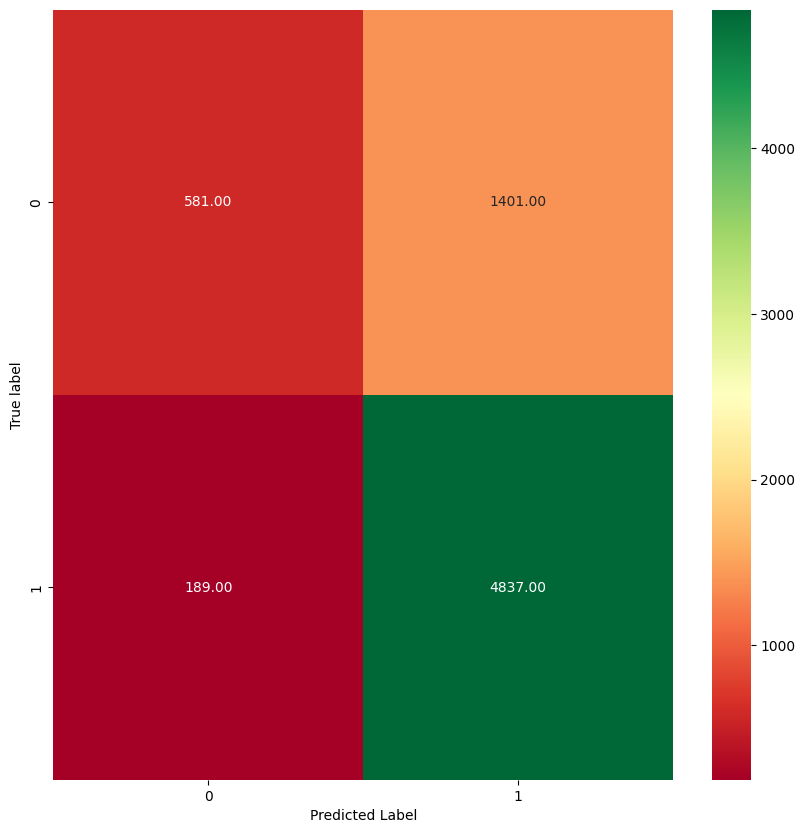

In [127]:
plot_cm(y2_test, y2_pred)

In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

print("Precison:\t",precision_score(y2_test, y2_pred))
print("Recall:\t\t",recall_score(y2_test, y2_pred))
print("F1:\t\t",f1_score(y2_test, y2_pred))

Precison:	 0.7754087848669445
Recall:		 0.9623955431754875
F1:		 0.8588423295454546


# Results
The model has a mediocre precision.
The Recall is high.
The F1 score is decently high which indicates there is not a huge tradeoff between precision and recall.

### Conclusion
Write a general conclusion about the results of your model.